### Explanation
This code identifies bacterial colonies from Petri dish time-lapse images and based on the fluorescent signal it is able to compute a characteristic pattern signal for each fluorescent protein. With this information, the code classify each of the identified colonies. 

##### Requirements
 - Image data
 - Have _fluopi_ module installed (open Terminal in Mac or command line in Windows and type  `pip install fluopi`; more info [here](https://packaging.python.org/tutorials/installing-packages/) about installing python packages)


## Analysis


### Loading packages

In [1]:
# import some useful packages to manage the data

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os.path

# modify some matplotlib parameters to manage the images in illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
# Import the FluoPi module
import fluopi.analysis as flua
import fluopi.plotting as flup

### Loading Data
In each _pathname_ is the complete path of the folder where images are stored. The example data can be obtained from the **_Files_** section in the [OSF FluoPi proyect](https://osf.io/dy6p2/). There you can download it from the *Google drive/Example_data* folder.

In [3]:
pathname1 = os.path.abspath('Images/Classifier/sfGFP_data/')
#refered to google drive folder Example_data\Classifier\sfGFP_data`
                      
pathname2 = os.path.abspath('Images/Classifier/CyOFP_data/')
#refered to google drive folder Example_data\Classifier\CyOFP_data

pathname3 = os.path.abspath('Images/Classifier/BeRFP_data/')
#refered to google drive folder Example_data\Classifier\BeRFP_data

pathname4 =  os.path.abspath('Images/Classifier/RGO_data/')
#refered to google drive folder Example_data\Classifier\RGO_data

Then, make the image names:

In [4]:
fname1 = os.path.join(pathname1, "image_%04d"+".jpg")
                      
fname2 = os.path.join(pathname2, "image_%04d"+".jpg")

fname3 = os.path.join(pathname3, "image_%04d"+".jpg")

fname4 =  os.path.join(pathname4, "image_%04d"+".jpg")

And also save the number name of the last image

In [5]:
lim1=int(os.listdir(pathname1)[-1].split('_')[-1].split('.')[0])
lim2=int(os.listdir(pathname2)[-1].split('_')[-1].split('.')[0])
lim3=int(os.listdir(pathname3)[-1].split('_')[-1].split('.')[0])
lim4=int(os.listdir(pathname4)[-1].split('_')[-1].split('.')[0])

Let's check the data loading and channel structure (e.g. with the last frame image of the second data set)

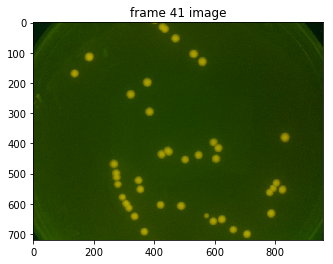

In [6]:
flup.plot_im_frame(fname2,lim2)

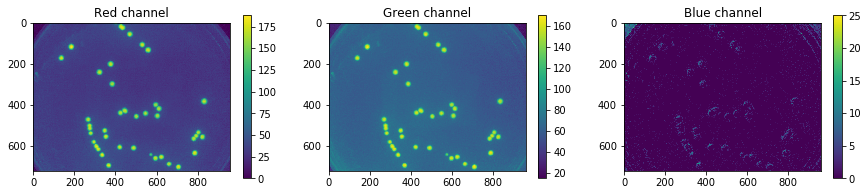

In [8]:
flup.plt_im_frame_channels(fname2,lim2)

Count the files in each data set:

In [9]:
imCount1=flua.count_files(pathname1,"jpg")
imCount2=flua.count_files(pathname2,"jpg")
imCount3=flua.count_files(pathname3,"jpg")
imCount4=flua.count_files(pathname4,"jpg")

/Users/fernanfederici/Dropbox/000_hardware/DIY_equip_2016/FluoPi/Examples/Images/Classifier/sfGFP_data = 40 files
/Users/fernanfederici/Dropbox/000_hardware/DIY_equip_2016/FluoPi/Examples/Images/Classifier/CyOFP_data = 42 files
/Users/fernanfederici/Dropbox/000_hardware/DIY_equip_2016/FluoPi/Examples/Images/Classifier/BeRFP_data = 42 files
/Users/fernanfederici/Dropbox/000_hardware/DIY_equip_2016/FluoPi/Examples/Images/Classifier/RGO_data = 42 files


Now, we organize the data and split it into the different channels. Also, here you can define with frames of the whole original data you are going to use (i.e. by defining `frame > 1` you can select which data to use)

In [10]:
DataS1={}
frames1 = 10   # use one image every 10 frames
DataS1['R'],DataS1['G'],DataS1['B']=flua.get_im_data(frames1,imCount1,fname1)
DataS1['Im']=fname1     # to store the related image source

In [11]:
DataS2={}
frames2 = 5     
DataS2['R'],DataS2['G'],DataS2['B']=flua.get_im_data(frames2,imCount2,fname2)
DataS2['Im']=fname2

In [12]:
DataS3={}
frames3 = 5     
DataS3['R'],DataS3['G'],DataS3['B']=flua.get_im_data(frames3,imCount3,fname3) 
DataS3['Im']=fname3

In [13]:
DataS4={}
frames4 = 5    
DataS4['R'],DataS4['G'],DataS4['B']=flua.get_im_data(frames4,imCount4,fname4)
DataS4['Im']=fname4

Now we have each data serie on a dictionary, organized in arrays for each channel.

### Background subtraction
First step is to identify a good background area and compute his value over time:

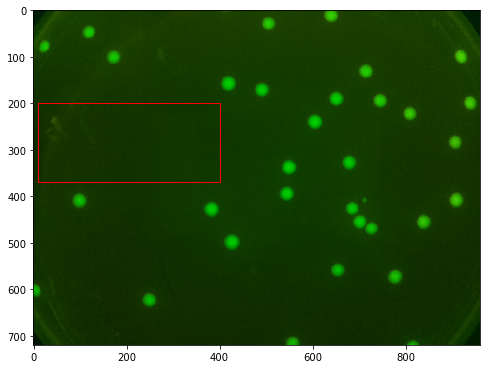

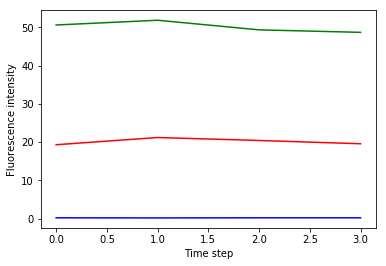

In [14]:
BG1=flua.bg_value(200,370,10,400,DataS1,imCount1)

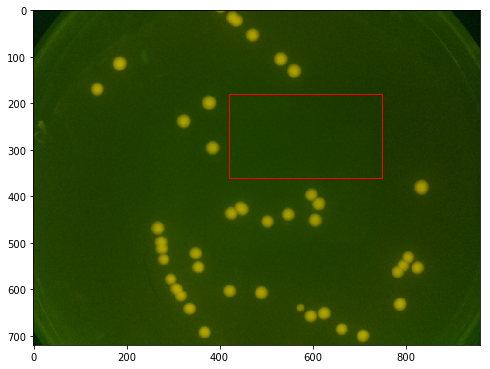

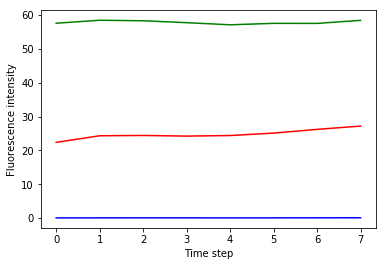

In [15]:
BG2=flua.bg_value(180,360,420,750,DataS2,imCount2)

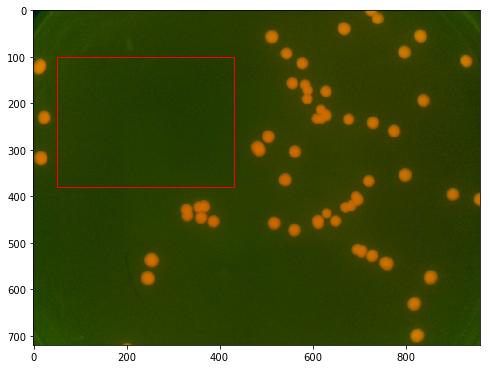

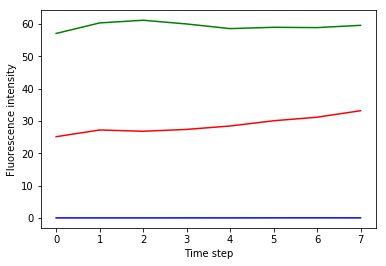

In [16]:
BG3=flua.bg_value(100,380,50,430,DataS3,imCount3)

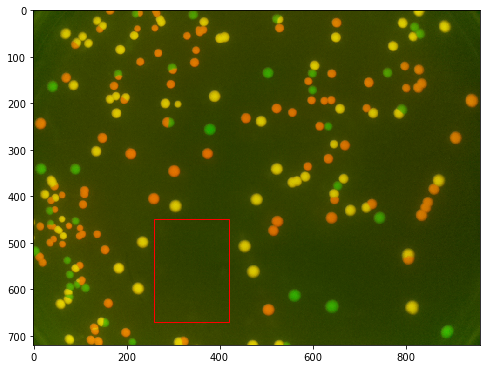

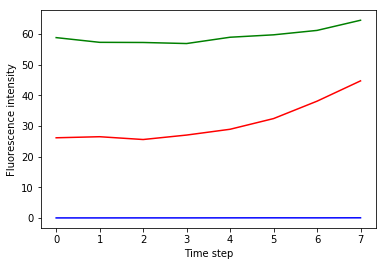

In [17]:
BG4=flua.bg_value(450,670,260,420,DataS4,imCount4)

We can subtract this background vector value to each frame on the data to eliminate the background effect

In [18]:
DataSB1=flua.bg_subst(DataS1,BG1)

In [19]:
DataSB2=flua.bg_subst(DataS2,BG2)

In [20]:
DataSB3=flua.bg_subst(DataS3,BG3)

In [21]:
DataSB4=flua.bg_subst(DataS4,BG4)

### Get colony position
A good way to identify where colonies are situated is by summing the value of each pixel for all the channels and all the frames

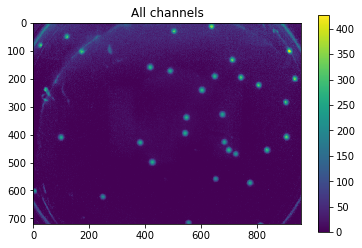

In [22]:
SumData1=flua.data_sum_time(DataSB1)

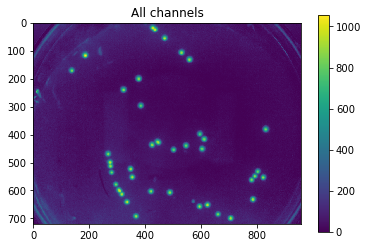

In [23]:
SumData2=flua.data_sum_time(DataSB2)

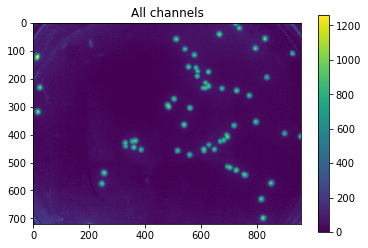

In [24]:
SumData3=flua.data_sum_time(DataSB3)

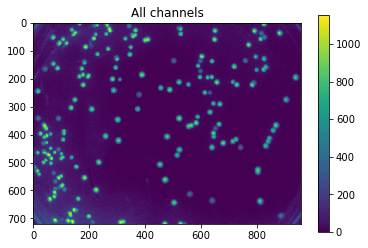

In [25]:
SumData4=flua.data_sum_time(DataSB4)

####  Apply a filter to smooth the data 
This process let us reduce noise and improve border detection

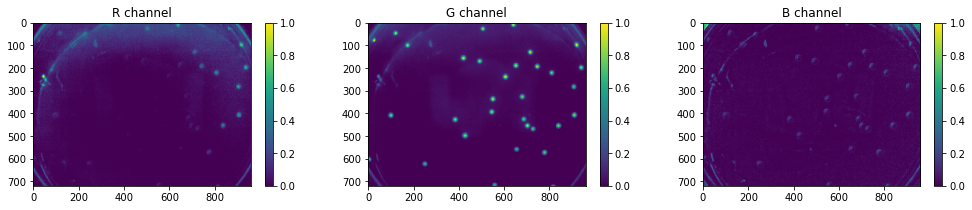

In [26]:
sDatS1,sDatSall1,SDatST1=flua.smooth_data(DataSB1,1.5)

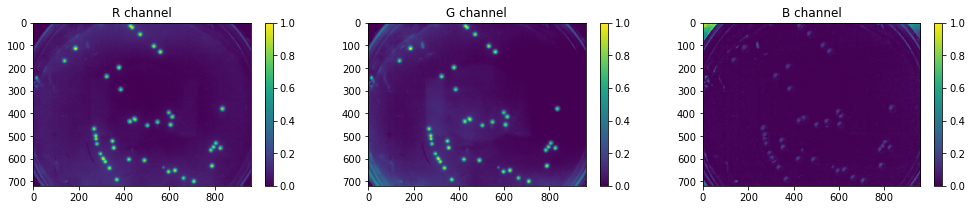

In [27]:
sDatS2,sDatSall2,SDatST2=flua.smooth_data(DataSB2,1.5)

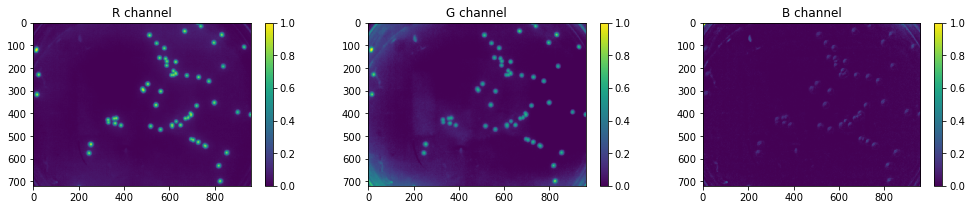

In [28]:
sDatS3,sDatSall3,SDatST3=flua.smooth_data(DataSB3,1.5)

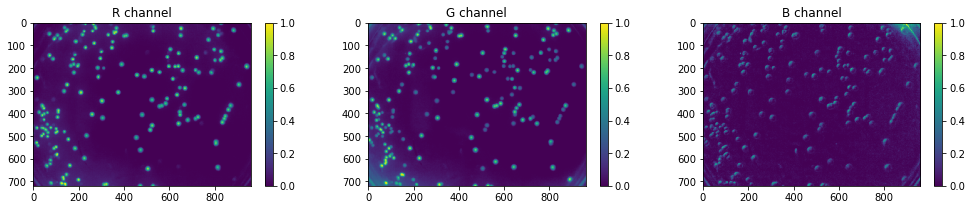

In [29]:
sDatS4,sDatSall4,SDatST4=flua.smooth_data(DataSB4,1.5)

### Blob detection

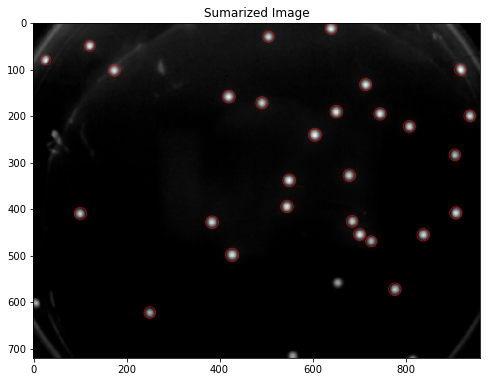

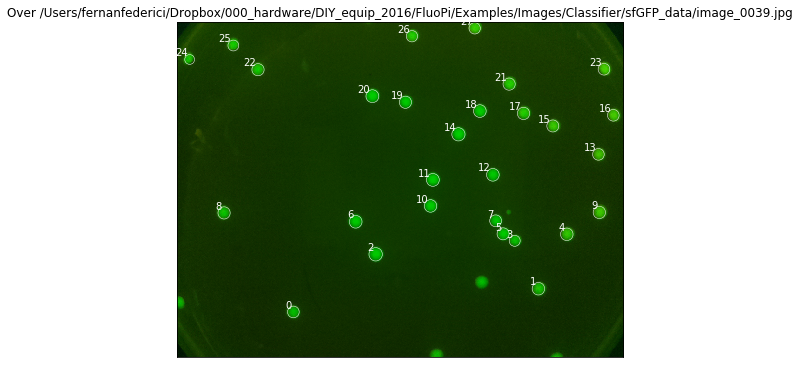

In [30]:
#blobD1 = flua.colony_blobs_id(sDatS1['G'],0.35,DataS1['Im']%(lim1-1)) 
#for green it was better to use only the green channel

blobD1 = flua.colony_blobs_id(sDatS1['G'],0.35,DataS1['Im']%(lim1),filename='Plots/Classifier/Blobs_sfGFP') 

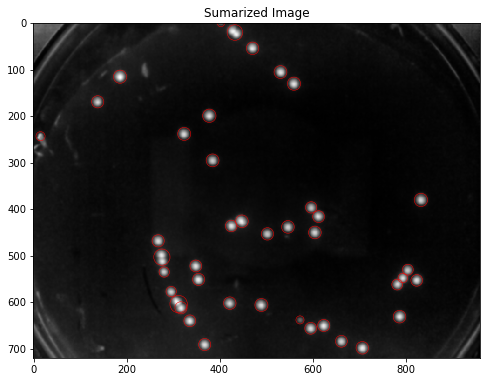

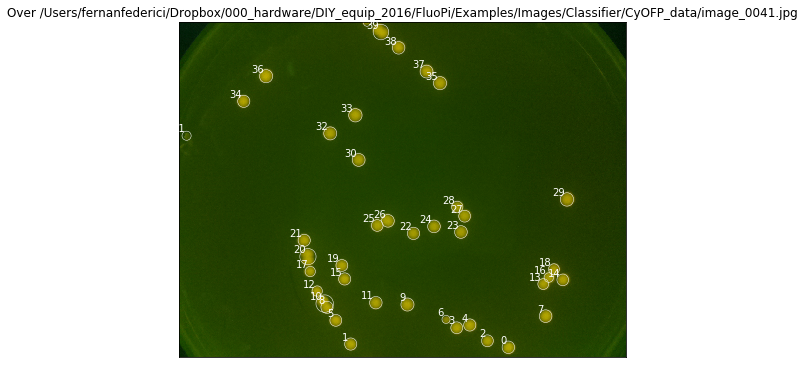

In [31]:
#blobD2 = flua.colony_blobs_id(sDatSall2,0.34,DataS2['Im']%(lim2-1))
blobD2 = flua.colony_blobs_id(sDatSall2,0.34,DataS2['Im']%(lim2),filename='Plots/Classifier/Blobs_CyOFP')

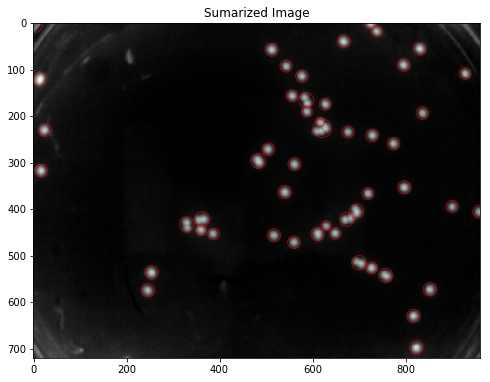

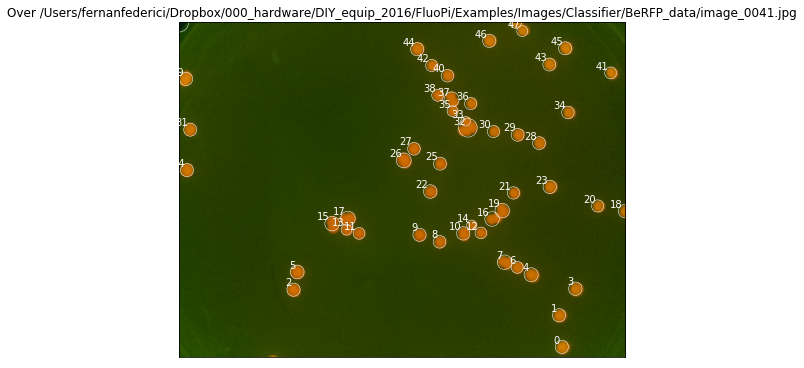

In [32]:
#blobD3 = flua.colony_blobs_id(sDatSall3,0.34,DataS3['Im']%(lim3-1))
blobD3 = flua.colony_blobs_id(sDatSall3,0.34,DataS3['Im']%(lim3),filename='Plots/Classifier/Blobs_BeRFP')

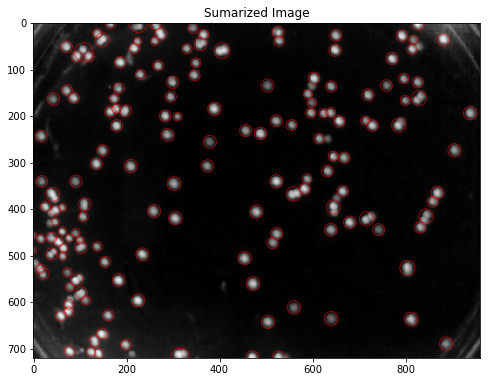

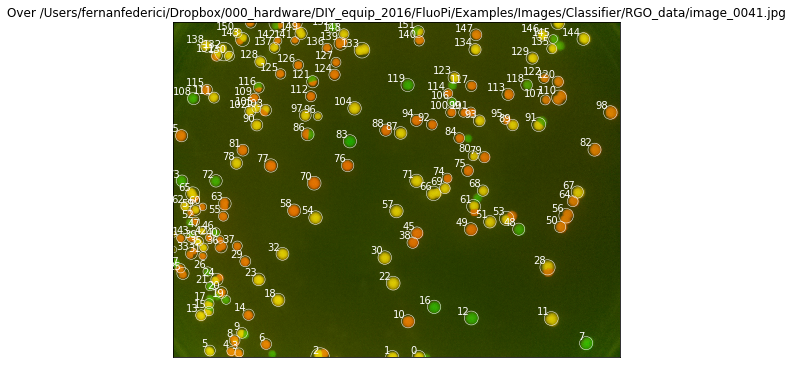

In [33]:
#blobD4 = flua.colony_blobs_id(sDatSall4,0.37,DataS4['Im']%(lim4-1))
blobD4 = flua.colony_blobs_id(sDatSall4,0.37,DataS4['Im']%(lim4),filename='Plots/Classifier/Blobs_MixFPs')

In [35]:
Rois1,RoisC1,NC1 = flua.obtain_rois(DataSB1,blobD1)
Rois2,RoisC2,NC2 = flua.obtain_rois(DataSB2,blobD2)
Rois3,RoisC3,NC3 = flua.obtain_rois(DataSB3,blobD3)
Rois4,RoisC4,NC4 = flua.obtain_rois(DataSB4,blobD4)

609
636
0
559
586
1
484
513
2
457
482
3
442
469
4
441
468
5
414
443
6
413
440
7
396
423
8
395
422
9
381
408
10
324
353
11
313
342
12
270
297
13
226
255
14
209
236
15
186
213
16
182
209
17
176
205
18
158
185
19
144
173
20
119
146
21
88
115
22
87
114
23
68
91
24
37
62
25
17
42
26
0
25
27
609
636
0
559
586
1
484
513
2
457
482
3
442
469
4
441
468
5
414
443
6
413
440
7
396
423
8
395
422
9
381
408
10
324
353
11
313
342
12
270
297
13
226
255
14
209
236
15
186
213
16
182
209
17
176
205
18
158
185
19
144
173
20
119
146
21
88
115
22
87
114
23
68
91
24
37
62
25
17
42
26
0
25
27
609
636
0
559
586
1
484
513
2
457
482
3
442
469
4
441
468
5
414
443
6
413
440
7
396
423
8
395
422
9
381
408
10
324
353
11
313
342
12
270
297
13
226
255
14
209
236
15
186
213
16
182
209
17
176
205
18
158
185
19
144
173
20
119
146
21
88
115
22
87
114
23
68
91
24
37
62
25
17
42
26
0
25
27
685
712
0
678
705
1
671
698
2
643
670
3
637
664
4
627
654
5
629
648
6
617
646
7
599
626
8
592
621
9
585
624
10
589
616
11
566
589
12
550
57

## ROIS Color Analysis

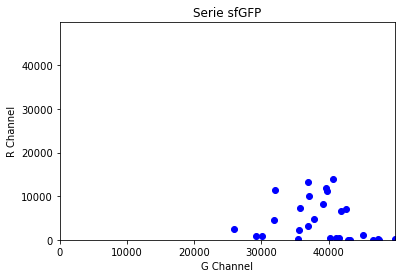

In [36]:
ChanX='G'
ChanY='R'
Xchan1,Ychan1=flup.rois_last_frame_2chan_plt(RoisC1,ChanX,ChanY,'Serie sfGFP')

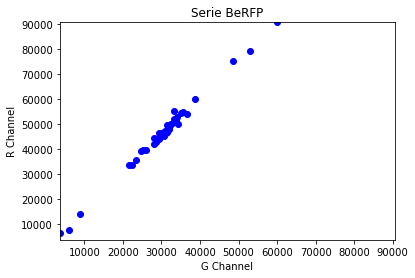

In [37]:
Xchan2,Ychan2=flup.rois_last_frame_2chan_plt(RoisC2,ChanX,ChanY,'Serie BeRFP')

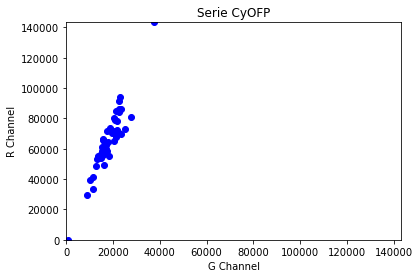

In [38]:
Xchan3,Ychan3=flup.rois_last_frame_2chan_plt(RoisC3,ChanX,ChanY,'Serie CyOFP')

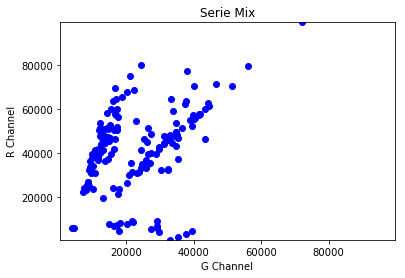

In [39]:
Xchan4,Ychan4=flup.rois_last_frame_2chan_plt(RoisC4,ChanX,ChanY,'Serie Mix')

 
1.119e-14 x + 4372


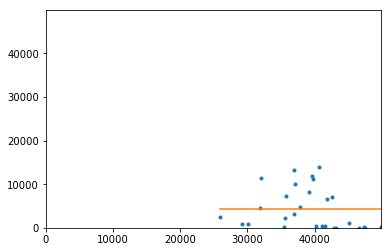

In [40]:
#fit1=flua.linear_fit(Xchan1[:,0],Ychan1[:,0])
fit1=flua.linear_fit(Xchan1[:,0],Ychan1[:,0],filename="Plots/Classifier/RG_fit1.pdf")

 
1.516 x + 288.7


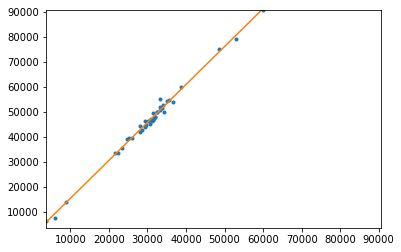

In [41]:
#fit2=flua.linear_fit(Xchan2[:,0],Ychan2[:,0])
fit2=flua.linear_fit(Xchan2[:,0],Ychan2[:,0],filename="Plots/Classifier/RG_fit2.pdf")

 
3.455 x + 3042


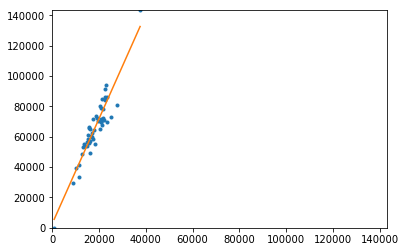

In [42]:
#fit3=flua.linear_fit(Xchan3[:,0],Ychan3[:,0])
fit3=flua.linear_fit(Xchan3[:,0],Ychan3[:,0],filename="Plots/Classifier/RG_fit3.pdf")

In [43]:
ClasS4,NClasS4=flua.colony_classifier([fit1,fit2,fit3],['GFP','CyOFP','BeRFP'],Xchan4,Ychan4)

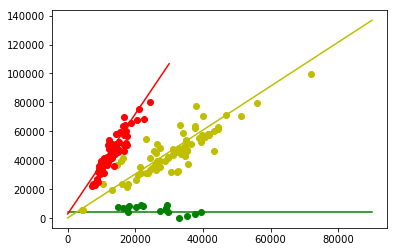

In [44]:
Xmin=0
flup.plt_lin_fit(Xmin,90000,fit1,'g')
flup.plt_lin_fit(Xmin,90000,fit2,'y')
flup.plt_lin_fit(Xmin,30000,fit3,'r')
plt.plot(NClasS4['GFP'][0],NClasS4['GFP'][1],'go')
plt.plot(NClasS4['CyOFP'][0],NClasS4['CyOFP'][1],'yo')
plt.plot(NClasS4['BeRFP'][0],NClasS4['BeRFP'][1],'ro')
plt.savefig("Plots/Classifier/Classification.pdf", transparent=True)